In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('C:\\HenryHarvin\\Dataset\\NSE-BSE.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,707.0,707.95,681.0,682.65,683.10,131700,910.52
1,9/27/2018,716.8,723.50,691.1,697.80,697.15,156222,1104.25
2,9/26/2018,720.0,724.40,709.0,710.00,711.60,71780,513.48
3,9/25/2018,725.0,725.00,710.5,715.00,718.15,93181,668.03
4,9/24/2018,725.3,728.00,712.0,721.00,721.90,126374,911.15


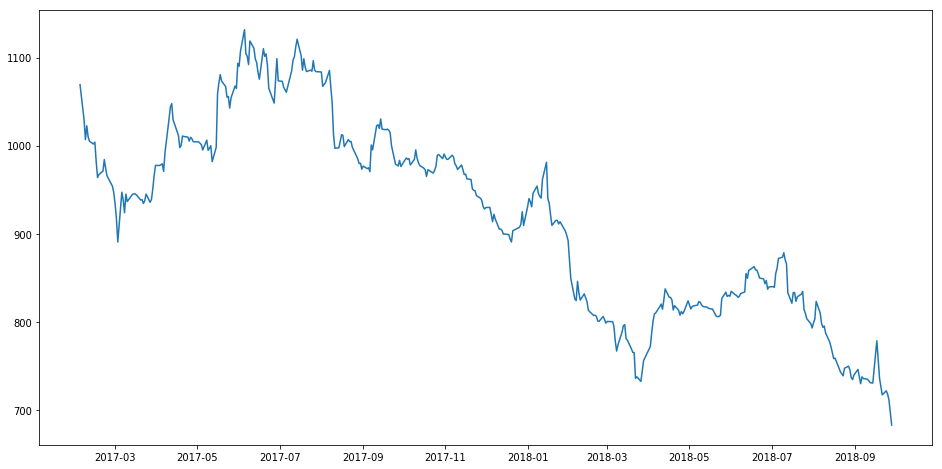

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%Y')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [3]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [4]:
#splitting into train and validation
train = new_data[:300]
valid = new_data[300:]

In [5]:
new_data.shape, train.shape, valid.shape


((410, 2), (300, 2), (110, 2))

In [6]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()



(Timestamp('2017-02-03 00:00:00'),
 Timestamp('2018-04-20 00:00:00'),
 Timestamp('2018-04-23 00:00:00'),
 Timestamp('2018-09-28 00:00:00'))

In [7]:
#make predictions
preds = []
for i in range(0,110):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/110
    preds.append(b)

In [8]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

2219.674276865369

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


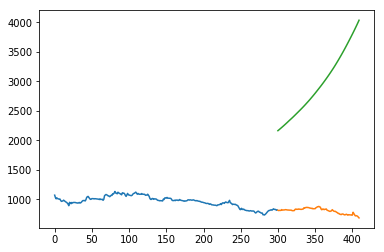

In [9]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [10]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%Y')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [38]:
!pip install fastai

  Using cached https://files.pythonhosted.org/packages/6d/64/cce82bddb80c0b0f5c703bbdafa94bfb69a1c5ad7a79cff00b482468f0d3/nvidia-ml-py3-7.352.0.tar.gz
  Running setup.py bdist_wheel for nvidia-ml-py3: started
  Running setup.py bdist_wheel for nvidia-ml-py3: finished with status 'done'
  Stored in directory: C:\Users\Deepak\AppData\Local\pip\Cache\wheels\e4\1d\06\640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
Successfully built nvidia-ml-py3
  Found existing installation: regex 2018.8.29
    Uninstalling regex-2018.8.29:
      Successfully uninstalled regex-2018.8.29


You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
#create features
from fastai.tabular import *


In [12]:
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [13]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1069.2,2017,2,5,3,4,34,False,False,False,False,False,False
1,1029.2,2017,2,6,6,0,37,False,False,False,False,False,False
2,1006.8,2017,2,6,7,1,38,False,False,False,False,False,False
3,1022.6,2017,2,6,8,2,39,False,False,False,False,False,False
4,1010.05,2017,2,6,9,3,40,False,False,False,False,False,False


In [14]:
#split into train and validation
train = new_data[:300]
valid = new_data[300:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

39.985766449148166

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


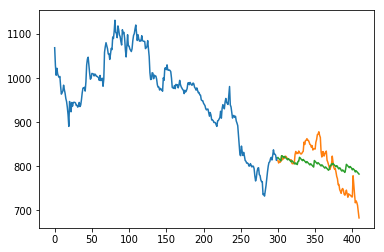

In [16]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[300:].index
train.index = new_data[:300].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [17]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [18]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

199.46944816186766

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


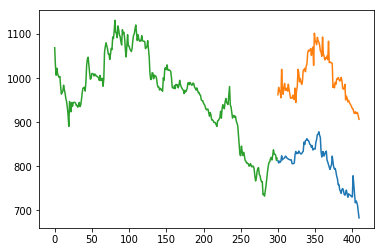

In [20]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [61]:
!pip install pmdarima


  Found existing installation: Cython 0.28.5
    Uninstalling Cython-0.28.5:
      Successfully uninstalled Cython-0.28.5


You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
from pmdarima.arima import auto_arima



In [22]:
data = df.sort_index(ascending=True, axis=0)

train = data[:300]
valid = data[300:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=110)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2312.483, BIC=2330.780, Fit time=2.459 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2445.281, BIC=2452.600, Fit time=0.054 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2370.715, BIC=2385.353, Fit time=0.670 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2312.423, BIC=2327.061, Fit time=1.408 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2313.068, BIC=2331.365, Fit time=2.370 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2445.730, BIC=2456.708, Fit time=0.323 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=2313.264, BIC=2331.562, Fit time=1.734 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2316.375, BIC=2338.332, Fit time=7.995 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=2314.291, BIC=2325.269, Fit time=0.456 seconds
Fit ARIMA: order=(0, 1, 2) s

In [23]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

60.166348454691175

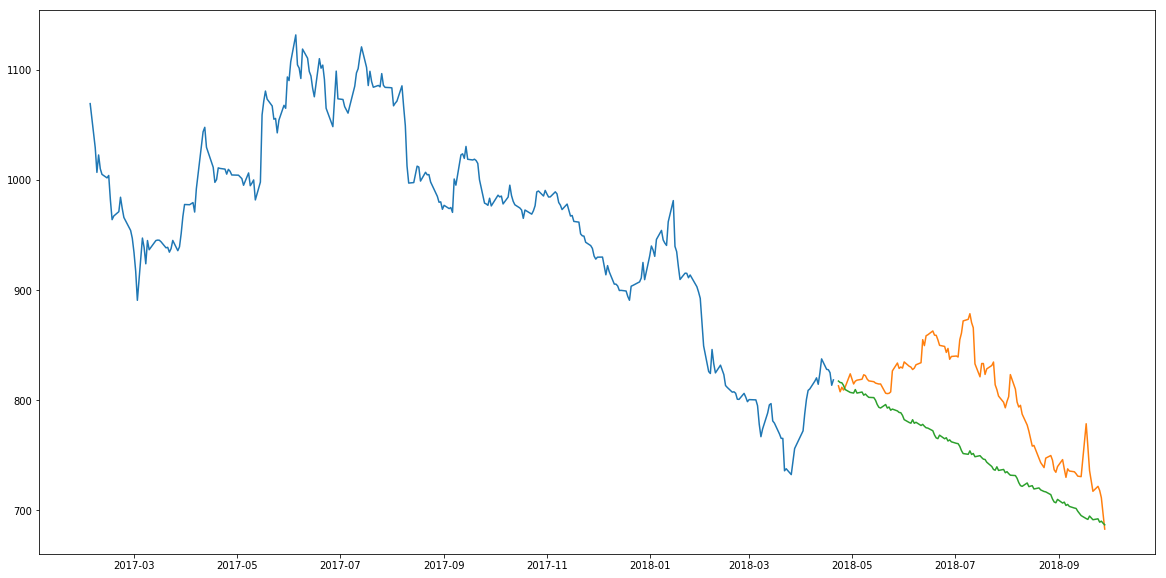

In [66]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])